In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [105]:
ratings = pd.read_csv('data/ratings (1).csv')

In [106]:
courses = pd.read_csv('data/courses.csv')

In [107]:
courses.head()

,courseId,Faculty,Course,Level,Related_Interests
0,1,Accounting Banking and Finance,Bachelor of Accounting (B.Acc),Undergraduate,Financial Analysis|Auditing|Accounting|Corpora...
1,2,Accounting Banking and Finance,Bachelor of Banking and Finance (BBF),Undergraduate,Investment Strategies|Financial Management|Ban...
2,3,Accounting Banking and Finance,Ordinary Diploma in Banking (ODB),Diploma,Commercial Banking|Retail Banking|Financial Se...
3,4,Accounting Banking and Finance,Ordinary Diploma in Accounting (ODA),Diploma,Financial Reporting|Cost Accounting|Bookkeepin...
4,5,Accounting Banking and Finance,Basic Technician Certificate in Accountancy (B...,Undergraduate,Bookkeeping|Tax Preparation|Accounting|Financi...


In [108]:
ratings.head()

,userId,courseId,rating,timestamp
0,14134,30,2,2022-10-10 17:21:25.913541
1,19224,6,2,2022-08-16 14:30:14.454004
2,370,38,1,2023-12-08 21:35:19.048880
3,7284,9,2,2020-11-24 12:41:00.998192
4,14238,19,1,2021-04-01 12:25:02.245872


In [109]:
n_ratings = len(ratings)
n_courses = ratings['courseId'].nunique()
n_users = ratings['userId'].nunique()

print(f"Number of ratings: {n_ratings}")
print(f"Number of unique courses: {n_courses}")
print(f"Number of unique users: {n_users}")
print(f"Average number of ratings per user: {round(n_ratings/n_users, 2)}")
print(f"Average number of ratings per course: {round(n_ratings/n_courses, 2)}")

Number of ratings: 100000
Number of unique courses: 42
Number of unique users: 19865
Average number of ratings per user: 5.03
Average number of ratings per course: 2380.95


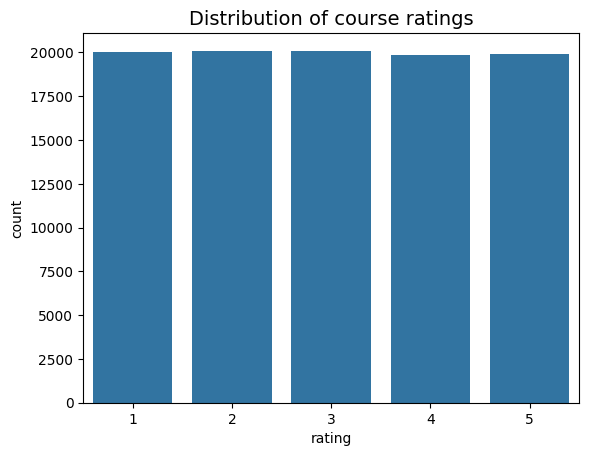

In [110]:
sns.countplot(x='rating', data=ratings)
plt.title("Distribution of course ratings", fontsize=14)
plt.show()

In [111]:
print(f"Mean global rating: {round(ratings['rating'].mean(),2)}.")

Mean global rating: 2.99.


In [112]:
mean_ratings = ratings.groupby('userId')['rating'].mean()
print(f"Mean rating per user: {round(mean_ratings.mean(),2)}.")

Mean rating per user: 2.99.


In [113]:
ratings['courseId'].value_counts()

courseId
10    2484
30    2478
13    2477
32    2476
36    2468
40    2449
25    2445
18    2437
26    2434
1     2431
27    2425
5     2417
15    2416
34    2415
6     2404
17    2390
21    2389
9     2384
39    2383
16    2379
42    2375
12    2374
23    2369
33    2367
4     2352
29    2352
19    2349
35    2349
22    2347
41    2347
20    2345
8     2341
24    2339
3     2337
37    2335
31    2330
14    2327
11    2319
38    2317
2     2307
28    2284
7     2257
Name: count, dtype: int64

In [114]:
course_ratings = ratings.merge(courses, on='courseId')
# course_ratings
course_ratings['Course'].value_counts()[0:10]

Course
Ordinary Diploma in Computer Science (ODCS)                    2484
Postgraduate Diploma in Human Resources Management (PGDHRM)    2478
Bachelor of Science in Actuarial Science (BSc AS)              2477
MSc in Insurance and Actuarial Science (MSc IAS)               2476
Certificate in Accountancy                                     2468
Certificate in Insurance and Social Protection                 2449
Postgraduate Diploma in Accountancy (PGDA)                     2445
Basic Technician Certificate in Social Protection (BTCSP)      2437
MSc in Human Resource Management                               2434
Bachelor of Accounting (B.Acc)                                 2431
Name: count, dtype: int64

In [115]:
mean_ratings = ratings.groupby('courseId')[['rating']].mean()
lowest_rated = mean_ratings['rating'].idxmin()
# mean_ratings
courses[courses['courseId'] == lowest_rated]

,courseId,Faculty,Course,Level,Related_Interests
19,20,Economics and Management Science,Ordinary Diploma in Taxation (ODTM),Diploma,Tax Law|Financial Planning|Auditing|Tax Compli...


In [116]:
highest_rated = mean_ratings['rating'].idxmax()

courses[courses['courseId'] == highest_rated]

,courseId,Faculty,Course,Level,Related_Interests
24,25,Accounting Banking and Finance,Postgraduate Diploma in Accountancy (PGDA),Postgraduate,Financial Reporting|Auditing|Cost Accounting|T...


In [117]:
ratings[ratings['courseId']==highest_rated]

,userId,courseId,rating,timestamp
50,7119,25,4,2023-02-01 08:10:11.287237
70,13470,25,2,2020-10-20 18:51:17.721729
76,2173,25,3,2023-01-12 12:30:33.397985
78,10812,25,5,2020-12-31 04:57:10.498370
103,1252,25,3,2021-12-17 06:57:28.468021
...,...,...,...,...
99870,9830,25,3,2020-12-01 17:48:57.767923
99887,14409,25,4,2023-09-15 08:48:31.501257
99943,5679,25,1,2020-09-29 04:54:33.099350
99961,3675,25,5,2024-02-02 20:36:27.961284


In [118]:
course_stats = ratings.groupby('courseId')['rating'].agg(['count', 'mean'])
course_stats.head()

,count,mean
courseId,,
1,2431,3.009461
2,2307,2.979627
3,2337,2.946085
4,2352,2.965561
5,2417,2.942077


In [119]:
C = course_stats['count'].mean()
m = course_stats['mean'].mean()

print(f"Average number of ratings for a given course: {C:.2f}")
print(f"Average rating for a given course: {m:.2f}")

def bayesian_avg(ratings):
    bayesian_avg = (C*m + ratings.sum())/(C+ratings.count())
    return round(bayesian_avg, 3)

Average number of ratings for a given course: 2380.95
Average rating for a given course: 2.99


In [120]:
# these are the two ratings for highest rated course
highest_rated = pd.Series([5,5])
bayesian_avg(highest_rated)

2.996

In [121]:
bayesian_avg_ratings = ratings.groupby('courseId')['rating'].agg(bayesian_avg).reset_index()
bayesian_avg_ratings.columns = ['courseId', 'bayesian_avg']
course_stats = course_stats.merge(bayesian_avg_ratings, on='courseId')

In [122]:
course_stats = course_stats.merge(courses[['courseId', 'Course']])
# course_stats.sort_values()

In [123]:
course_stats.sort_values(by='bayesian_avg')

,courseId,count,mean,bayesian_avg,Course
19,20,2345,2.920256,2.958,Ordinary Diploma in Taxation (ODTM)
4,5,2417,2.942077,2.968,Basic Technician Certificate in Accountancy (B...
2,3,2337,2.946085,2.971,Ordinary Diploma in Banking (ODB)
15,16,2379,2.949979,2.972,Ordinary Diploma in Social Protection (ODSP)
28,29,2352,2.951956,2.973,Postgraduate Diploma in Business Administratio...
26,27,2425,2.951753,2.973,MBA in International Business
7,8,2341,2.954293,2.975,Bachelor in Computer Science (BSc CS)
3,4,2352,2.965561,2.980,Ordinary Diploma in Accounting (ODA)
11,12,2374,2.965880,2.980,Bachelor of Science in Insurance and Risk Mana...
16,17,2390,2.966527,2.981,Basic Technician Certificate in Insurance and ...


In [124]:
# top 5 highest rated courses
course_stats.sort_values(by='bayesian_avg', ascending=False).head()

,courseId,count,mean,bayesian_avg,Course
24,25,2445,3.065031,3.030,Postgraduate Diploma in Accountancy (PGDA)
33,34,2415,3.060870,3.028,Postgraduate Diploma in Insurance and Risk Man...
21,22,2347,3.043034,3.019,MSc in Accounting and Finance
40,41,2347,3.044738,3.019,Certificate in Social Protection
13,14,2327,3.041255,3.018,Bachelor of Science in Social Protection (BSc SP)


In [125]:
# top 5 lowest rated courses
course_stats.sort_values(by='bayesian_avg', ascending=True).head()

,courseId,count,mean,bayesian_avg,Course
19,20,2345,2.920256,2.958,Ordinary Diploma in Taxation (ODTM)
4,5,2417,2.942077,2.968,Basic Technician Certificate in Accountancy (B...
2,3,2337,2.946085,2.971,Ordinary Diploma in Banking (ODB)
15,16,2379,2.949979,2.972,Ordinary Diploma in Social Protection (ODSP)
28,29,2352,2.951956,2.973,Postgraduate Diploma in Business Administratio...


In [126]:
courses['Related_Interests'] = courses['Related_Interests'].apply(lambda x: x.split('|'))
courses.head()

,courseId,Faculty,Course,Level,Related_Interests
0,1,Accounting Banking and Finance,Bachelor of Accounting (B.Acc),Undergraduate,"[Financial Analysis, Auditing, Accounting, Cor..."
1,2,Accounting Banking and Finance,Bachelor of Banking and Finance (BBF),Undergraduate,"[Investment Strategies, Financial Management, ..."
2,3,Accounting Banking and Finance,Ordinary Diploma in Banking (ODB),Diploma,"[Commercial Banking, Retail Banking, Financial..."
3,4,Accounting Banking and Finance,Ordinary Diploma in Accounting (ODA),Diploma,"[Financial Reporting, Cost Accounting, Bookkee..."
4,5,Accounting Banking and Finance,Basic Technician Certificate in Accountancy (B...,Undergraduate,"[Bookkeeping, Tax Preparation, Accounting, Fin..."


In [127]:
from collections import Counter

interest_frequency = Counter(i for interests in courses['Related_Interests'] for i in interests)

print(f"There are {len(interest_frequency)} Related interests.")

interest_frequency

There are 72 Related interests.


Counter({'Auditing': 10,
         'Risk Assessment': 7,
         'Social Policy': 7,
         'Financial Analysis': 6,
         'Risk Management': 6,
         'Database Management': 6,
         'Insurance Policies': 6,
         'Corporate Finance': 5,
         'Financial Reporting': 5,
         'Network Administration': 5,
         'Financial Planning': 5,
         'Public Health': 5,
         'Community Development': 5,
         'Welfare Systems': 5,
         'Investment Strategies': 4,
         'Software Development': 4,
         'IT Support': 4,
         'Policy Analysis': 4,
         'Tax Law': 4,
         'Tax Consulting': 4,
         'Accounting': 3,
         'Financial Modeling': 3,
         'Financial Management': 3,
         'Commercial Banking': 3,
         'Retail Banking': 3,
         'Financial Services': 3,
         'Investment Analysis': 3,
         'Bookkeeping': 3,
         'Taxation': 3,
         'Cybersecurity': 3,
         'Hardware Troubleshooting': 3,
         'So

In [128]:
print("The 5 most common interests: \n", interest_frequency.most_common(5))

The 5 most common interests: 
 [('Auditing', 10), ('Risk Assessment', 7), ('Social Policy', 7), ('Financial Analysis', 6), ('Risk Management', 6)]


([0, 1, 2, 3, 4],
 [Text(0, 0, 'Auditing'),
  Text(1, 0, 'Risk Assessment'),
  Text(2, 0, 'Social Policy'),
  Text(3, 0, 'Financial Analysis'),
  Text(4, 0, 'Insurance Policies')])

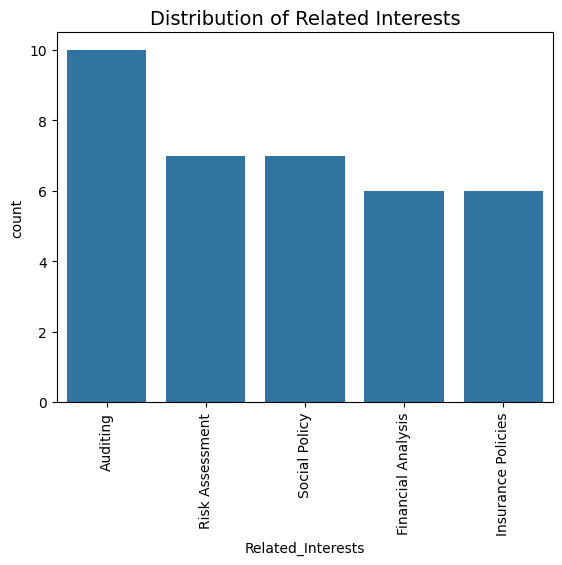

In [129]:
interest_frequency_df = pd.DataFrame([interest_frequency]).T.reset_index()
interest_frequency_df.columns= ['Related_Interests', 'count']

sns.barplot(x='Related_Interests', y='count', data=interest_frequency_df.sort_values(by='count', ascending=False).head())
plt.title("Distribution of Related Interests", fontsize=14)
plt.xticks(rotation=90)

In [130]:
from scipy.sparse import csr_matrix

def create_X(df):
    """
    Generates a sparse matrix from ratings dataframe.

    Args:
        df: pandas dataframe containing 3 columns (userId, courseId, rating)

    Returns:
        X: sparse matrix
        user_mapper: dict that maps user id's to user indices
        user_inv_mapper: dict that maps user indices to user id's
        course_mapper: dict that maps course id's to course indices
        course_inv_mapper: dict that maps course indices to course id's
    """
    M = df['userId'].nunique()
    N = df['courseId'].nunique()

    user_mapper = dict(zip(np.unique(df["userId"]), list(range(M))))
    course_mapper = dict(zip(np.unique(df["courseId"]), list(range(N))))

    user_inv_mapper = dict(zip(list(range(M)), np.unique(df["userId"])))
    course_inv_mapper = dict(zip(list(range(N)), np.unique(df["courseId"])))

    user_index = [user_mapper[i] for i in df['userId']]
    item_index = [course_mapper[i] for i in df['courseId']]

    X = csr_matrix((df["rating"], (user_index,item_index)), shape=(M,N))

    return X, user_mapper, course_mapper, user_inv_mapper, course_inv_mapper

X, user_mapper, course_mapper, user_inv_mapper, course_inv_mapper = create_X(ratings)

In [131]:
X.shape

(19865, 42)

In [132]:
n_total =X.shape[0]*X.shape[1]
n_ratings =X.nnz
sparsity = n_ratings/n_total
print(f"Matrix sparsity: {round(sparsity*100,2)}%")

Matrix sparsity: 11.31%


In [133]:
n_ratings_per_user = X.getnnz(axis=1)
len(n_ratings_per_user)

19865

In [134]:
n_ratings_per_course = X.getnnz(axis=0)
len(n_ratings_per_course)

42

In [135]:
print(f"Most rated course has {n_ratings_per_course.max()} ratings.")
print(f"Least rated course has {n_ratings_per_course.min()} ratings.")

Most rated course has 2345 ratings.
Least rated course has 2140 ratings.


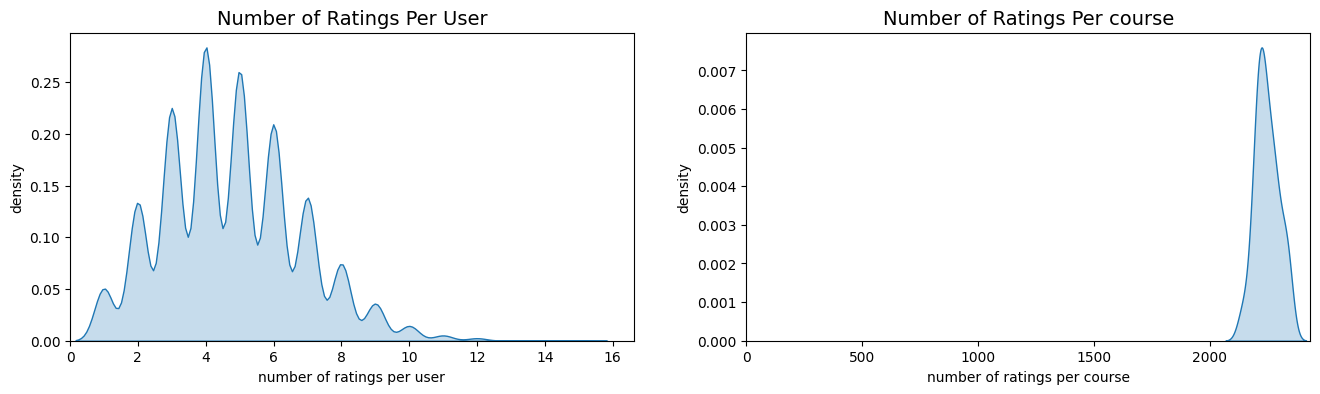

In [136]:
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
sns.kdeplot(n_ratings_per_user, fill=True)
plt.xlim(0)
plt.title("Number of Ratings Per User", fontsize=14)
plt.xlabel("number of ratings per user")
plt.ylabel("density")
plt.subplot(1,2,2)
sns.kdeplot(n_ratings_per_course, fill=True)
plt.xlim(0)
plt.title("Number of Ratings Per course", fontsize=14)
plt.xlabel("number of ratings per course")
plt.ylabel("density")
plt.show()

In [138]:
from sklearn.neighbors import NearestNeighbors

def find_similar_courses(course_id, X, course_mapper, course_inv_mapper, k, metric='cosine'):
    """
    Finds k-nearest neighbours for a given course id.

    Args:
        course_id: id of the course of interest
        X: user-item utility matrix
        k: number of similar courses to retrieve
        metric: distance metric for kNN calculations

    Output: returns list of k similar course ID's
    """
    X = X.T
    neighbour_ids = []

    course_ind = course_mapper[course_id]
    course_vec = X[course_ind]
    if isinstance(course_vec, (np.ndarray)):
        course_vec = course_vec.reshape(1,-1)
    # use k+1 since kNN output includes the courseId of interest
    kNN = NearestNeighbors(n_neighbors=k+1, algorithm="brute", metric=metric)
    kNN.fit(X)
    neighbour = kNN.kneighbors(course_vec, return_distance=False)
    for i in range(0,k):
        n = neighbour.item(i)
        neighbour_ids.append(course_inv_mapper[n])
    neighbour_ids.pop(0)
    return neighbour_ids

In [139]:
similar_courses = find_similar_courses(1, X, course_mapper, course_inv_mapper, k=10)
similar_courses

[30, 21, 7, 24, 41, 19, 8, 10, 42]

In [140]:
# using cosine metrics
course_titles = dict(zip(courses['courseId'], courses['Course']))
# course_titles
course_id = 1

similar_courses = find_similar_courses(course_id, X, course_mapper, course_inv_mapper, metric='cosine', k=10)
course_title = course_titles[course_id]

print(f"Because you selected {course_title}:")
for i in similar_courses:
  print(course_titles[i])

Because you selected Bachelor of Accounting (B.Acc):
Postgraduate Diploma in Human Resources Management (PGDHRM)
MSc in Finance and Investment
Bachelor of Science in Information Technology (BSc IT)
Postgraduate Diploma in Financial Management (PGDFM)
Certificate in Social Protection
Bachelor of Science in Taxation (BSc Taxation)
Bachelor in Computer Science (BSc CS)
Ordinary Diploma in Computer Science (ODCS)
Basic Technician Certificate in Computing and Information Technology


In [141]:
# using euclidean, you can replace it with manhattan for another view
course_titles = dict(zip(courses['courseId'], courses['Course']))
# course_titles
course_id = 1

similar_courses = find_similar_courses(course_id, X, course_mapper, course_inv_mapper, metric='euclidean', k=10)
course_title = course_titles[course_id]

print(f"Because you selected {course_title}:")
for i in similar_courses:
  print(course_titles[i])

Because you selected Bachelor of Accounting (B.Acc):
Bachelor of Science in Information Technology (BSc IT)
Ordinary Diploma in Taxation (ODTM)
Bachelor in Computer Science (BSc CS)
Ordinary Diploma in Banking (ODB)
Certificate in Taxation
Postgraduate Diploma in Business Administration (PGDBA)
Bachelor of Science in Taxation (BSc Taxation)
Postgraduate Diploma in Tax Management (PGDTM)
MSc in Finance and Investment


In [142]:
interests = set(i for I in courses['Related_Interests'] for i in I)
# interests
for i in interests:
    courses[i] = courses.Related_Interests.transform(lambda x: int(i in x))

course_interests = courses.drop(columns=['courseId', 'Course','Related_Interests', 'Faculty', 'Level'])

In [143]:
course_interests.head()

,Employee Development,Tax Compliance,Public Health,Social Policy,Investment Strategies,Financial Analysis,Social Work,Organizational Behavior,IT Project Management,Recruitment,...,Welfare Systems,Insurance Law,Data Structures,Tax Consulting,Banking,Risk Management,Commercial Banking,Actuarial Science,Software Development,Retail Banking
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [144]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim = cosine_similarity(course_interests, course_interests)
print(f"Dimensions of our interests cosine similarity matrix: {cosine_sim.shape}")

Dimensions of our interests cosine similarity matrix: (42, 42)


In [157]:
from fuzzywuzzy import process
import Levenshtein

def course_finder(title):
    all_titles = courses['Course'].tolist()
    closest_match = process.extractOne(title, all_titles)
    return closest_match[0]

In [147]:
title = course_finder('finance')
title

'Bachelor of Banking and Finance (BBF)'

In [148]:
course_idx = dict(zip(courses['Course'], list(courses.index)))
idx = course_idx[title]
print(f"course index for Account: {idx}")

course index for Account: 1


In [149]:
n_recommendations=10
sim_scores = list(enumerate(cosine_sim[idx]))
sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
sim_scores=sim_scores[1:n_recommendations+1]
sim_scores


[(23, 0.7999999999999999),
 (20, 0.39999999999999997),
 (22, 0.39999999999999997),
 (0, 0.19999999999999998),
 (2, 0.19999999999999998),
 (5, 0.19999999999999998),
 (21, 0.19999999999999998),
 (28, 0.19999999999999998),
 (36, 0.19999999999999998),
 (3, 0.0)]

In [150]:
similar_courses= [i[0] for i in sim_scores]
similar_courses

[23, 20, 22, 0, 2, 5, 21, 28, 36, 3]

In [151]:
print(f"Because you selected {title}:")
courses['Course'].iloc[similar_courses]

Because you selected Bachelor of Banking and Finance (BBF):


23    Postgraduate Diploma in Financial Management (...
20                        MSc in Finance and Investment
22                                       MSc in Finance
0                        Bachelor of Accounting (B.Acc)
2                     Ordinary Diploma in Banking (ODB)
5     Basic Technician Certificate in Banking and Fi...
21                        MSc in Accounting and Finance
28    Postgraduate Diploma in Business Administratio...
36                   Certificate in Banking and Finance
3                  Ordinary Diploma in Accounting (ODA)
Name: Course, dtype: object

In [152]:
def get_content_based_recommendations(title_string, n_recommendations=10):
    title = course_finder(title_string)
    idx = course_idx[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:(n_recommendations+1)]
    similar_courses = [i[0] for i in sim_scores]
    print(f"Because you selected {title}:")
    print(courses['Course'].iloc[similar_courses])

In [153]:
# provide the course keywords and how many recommendations you would like to
# generate
get_content_based_recommendations('it', 5)

Because you selected Bachelor of Science in Information Technology (BSc IT):
8     Ordinary Diploma in Information Technology (ODIT)
34    MSc in Information Technology and Management (...
10    Basic Technician Certificate in Computing and ...
38    Certificate in Computer and Information Techno...
41    Basic Technician Certificate in Computing and ...
Name: Course, dtype: object


In [154]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=20, n_iter=10)
Q = svd.fit_transform(X.T)
Q.shape

(42, 20)

In [155]:
course_id = 1
similar_courses = find_similar_courses(course_id, Q.T, course_mapper, course_inv_mapper, metric='cosine', k=10)
course_title = course_titles[course_id]

print(f"Because you selected {course_title} similar courses are:")
for i in similar_courses:
    print(course_titles[i])

Because you selected Bachelor of Accounting (B.Acc) similar courses are:
Basic Technician Certificate in Computing and Information Technology
Ordinary Diploma in Taxation (ODTM)
Certificate in Social Protection
MSc in Finance
Postgraduate Diploma in Business Administration (PGDBA)
MSc in Finance and Investment
Bachelor in Computer Science (BSc CS)
Bachelor of Banking and Finance (BBF)
Postgraduate Diploma in Tax Management (PGDTM)
